# Ising Model

In [1]:
using Pkg
Pkg.activate("../")

  Activating project at `d:\Projects\Dr. Heyl Group\ising-xy-distances-study`

In [17]:
using Plots

In [10]:
using BenchmarkTools

In [46]:
include("../src/spinmc.jl");

In [53]:
@time temps, mags = let L = 128
    temps = collect(0.5:0.1:3.5)
    mags = zeros(Float64, length(temps))
    nsteps = 10000
    Threads.@threads for t_idx in eachindex(temps)
        m = 0
        model = ClassicalIsingModel2D(L, :cold)
        stack = LazyStack(Int)
        cluster = falses(L, L)
        T = temps[t_idx]
        P_add = isingwolff_Padd(T)
        for i=1:nsteps
            wolff_update!(model, T; cluster=cluster, stack=stack, P_add=P_add)
            m += magnetization(model)
        end
        mags[t_idx] = m / (nsteps*model.L^2) 
    end
    temps, mags
end

150.213312 seconds (661.40 k allocations: 24.837 MiB, 0.05% compilation time)


([0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4  …  2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5], [0.999999755859375, 0.9999970703125, 0.999978076171875, 0.9999080078125, 0.99970673828125, 0.9992677124023438, 0.998447314453125, 0.9970226318359375, 0.9947885009765625, 0.9913848999023438  …  0.0404006103515625, 0.0294752685546875, 0.03150782470703125, 0.02592232666015625, 0.0201162841796875, 0.0267496337890625, 0.02426103515625, 0.0223350830078125, 0.02729930419921875, 0.0254934814453125])

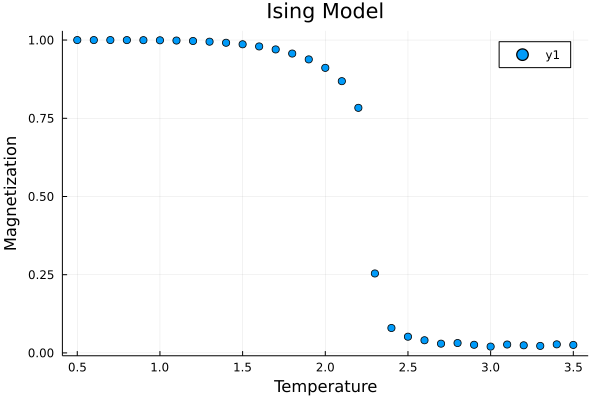

In [54]:
scatter(temps, mags, xlabel="Temperature", ylabel="Magnetization", title="Ising Model")

In [50]:
cls = falses(64, 64)
stk = LazyStack([0 for i=1:1000])
mm = ClassicalIsingModel2D(64, :cold)
@btime wolff_update!(mm, 0.5, cluster=cls, stack=stk)

  214.800 μs (2 allocations: 64 bytes)


ClassicalIsingModel2D{Int64, 64}(64, [-1 -1 … -1 -1; -1 -1 … -1 -1; … ; -1 -1 … -1 -1; -1 -1 … -1 -1], (0, 4096), (CartesianIndex(1, 0), CartesianIndex(63, 0), CartesianIndex(0, 1), CartesianIndex(0, 63)))

In [ ]:
ff = falses(10, 10)

function make_false!(m::BitMatrix)
    m .= false
end

@btime ff .= true
@btime for i=1:100
    make_false!(ff)
end

In [ ]:
@time ising_get_measurements_to_txt(24, 2.2, 1000, 1000, 10,
    ntau=2,
    start=:cold,
    store_at="D:\\Projects\\Dr. Heyl Group\\montecarlo-spin-configurations-and-distances-study\\data",
    verbose=false,
    mode="w",
    get_mags=true,
    get_structure_factors=true)

In [ ]:
let
    data_path = "D:\\Projects\\Dr. Heyl Group\\montecarlo-spin-configurations-and-distances-study\\data"
    data = readdlm(joinpath([data_path, "Ising", "Size64", "uncorr_configs", "ising_uncorr_configs_temp2.2_L64.txt"]), ',', Int)
    println(size(data))
end

In [ ]:
let 
    mm = ClassicalIsingModel2D(48, :hot)
    for i=1:100
        wolff_update!(mm, 2.4)
    end
    @assert structure_factor(mm) == structure_factor(mm.lattice, 48)
    println(structure_factor(mm))
    println(structure_factor(mm.lattice, 48))
    @time structure_factor(mm)
    @time structure_factor(mm.lattice, 48)
end